Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
import joblib
import xgboost as xgb
import pickle

In [4]:
def carregar_dataset(dataset_func):
    """
    Descrição:
        Essa função é usada para carregar um dataset do Scikit-learn, separando-o em dados e rótulos.

    Parâmetros:
        dataset_func: função
            Função para carregar o dataset (por exemplo, `load_iris`, `load_digits`).

    Retorno:
        dataset: objeto
            O dataset completo carregado.
        X: array
            As características (dados) do dataset.
        y: array
            Os rótulos do dataset.
    """
    # Carregar o dataset especifico
    dataset = dataset_func()
    X = dataset.data
    Y = dataset.target

    return dataset, X, Y

In [5]:
def dividir_treinamento(X, Y, test_size=0.2, random_state=42):
    """"
    Descrição: 
        Função usada para Dividir matrizes ou matrizes em subconjuntos de trem aleatório e teste. para isso vou usar a função train_test_split()
        
    Parametrôs: data, label, test_size, random_state
        X = Características de entrada
        Y = Rotulos
        test_size = representar a proporção do conjunto de dados para incluir na divisão de teste.
        random_state = Controla o embaralhamento aplicado aos dados antes de aplicar a divisão. Passe um int para saída reprodutível em várias chamadas de função.

    Retorno: X_train, X_test, y_train, y_test
        X_train = dados de treinamento separado
        X_test = dados de teste separado
        y_train = rotulos de treinamento
        y_test = rotulos de teste
    """
    # Dividir o dataset em treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

In [6]:
def normalizar_dados(X_train, X_test):
    """
    Descrição:
        Função para normalizar os dados de treinamento e teste usando StandardScaler.
    
    Parâmetros:
        X_train: array-like
            Dados de treinamento.
        X_test: array-like
            Dados de teste.
    
    Retorno:
        X_train_normalizado: array-like
            Dados de treinamento normalizados.
        X_test_normalizado: array-like
            Dados de teste normalizados.
        scaler: StandardScaler
            O objeto StandardScaler treinado, que pode ser usado para normalizar novos dados no futuro.
    """
    # Instanciando o StandardScaler
    scaler = StandardScaler()
    
    # Ajustando o scaler e transformando os dados de treinamento
    X_train_normalizado = scaler.fit_transform(X_train)
    
    # Transformando os dados de teste com o mesmo scaler
    X_test_normalizado = scaler.transform(X_test)
    
    return X_train_normalizado, X_test_normalizado, scaler

In [7]:
def treinando_modelo(modelo, X_train, y_train, X_test, random_state=None):
    """
    Descrição:
        Função para treinar um modelo de classificação usando o sklearn.
    
    Parâmetros:
        modelo: classificador
            O modelo que queremos usar como classificador (por exemplo, DecisionTreeClassifier, RandomForestClassifier).
        X_train: array-like
            Dados de treinamento.
        X_test: array-like
            Dados de teste.
        y_train: array-like
            Rótulos do conjunto de treinamento.
        random_state: int, opcional
            Controla o embaralhamento aplicado aos dados antes de aplicar a divisão. Passe um int para saída reprodutível.

    Retorno:
        modelo_treinado: classificador
            O modelo treinado.
        y_pred: array
            Previsões do modelo para o conjunto de teste.
    """
    # Verificar se o modelo aceita o parâmetro random_state
    if 'random_state' in modelo().get_params().keys():
        modelo_treinado = modelo(random_state=random_state)
    else:
        modelo_treinado = modelo()

    # Treinar o modelo
    modelo_treinado.fit(X_train, y_train)

    # Prever as classes para o conjunto de teste
    y_pred = modelo_treinado.predict(X_test)

    return modelo_treinado, y_pred


In [9]:
def treinando_com_grid_search(modelo, param_grid, X_train, y_train, X_test, cv=5, random_state=42):
    """
    Descrição:
        Função para treinar um modelo de classificação usando GridSearchCV para encontrar os melhores hiperparâmetros.
    
    Parâmetros:
        modelo: classificador
            O modelo que queremos usar como classificador (por exemplo, DecisionTreeClassifier, RandomForestClassifier).
        param_grid: dict
            Dicionário contendo os hiperparâmetros que serão testados no GridSearchCV.
        X_train: array-like
            Dados de treinamento.
        y_train: array-like
            Rótulos do conjunto de treinamento.
        X_test: array-like
            Dados de teste.
        cv: int, opcional (default=5)
            Número de divisões para a validação cruzada.
        random_state: int, opcional (default=42)
            Controla o embaralhamento aplicado aos dados para garantir reprodutibilidade.

    Retorno:
        melhor_modelo: classificador
            O melhor modelo treinado com os hiperparâmetros otimizados.
        y_pred: array
            Previsões do modelo para o conjunto de teste.
        melhores_parametros: dict
            Os melhores hiperparâmetros encontrados pelo GridSearchCV.
    """
    # Instanciando o GridSearchCV
    grid_search = GridSearchCV(estimator=modelo(random_state=random_state), param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)
    
    # Executando o GridSearchCV para encontrar os melhores hiperparâmetros
    grid_search.fit(X_train, y_train)
    
    # Obter os melhores parâmetros
    melhores_parametros = grid_search.best_params_
    
    # Treinar o modelo final com os melhores parâmetros
    melhor_modelo = grid_search.best_estimator_
    
    # Prever as classes para o conjunto de teste
    y_pred = melhor_modelo.predict(X_test)
    
    return melhor_modelo, y_pred, melhores_parametros

In [10]:
def configurar_e_treinar_modelo_arvore_decisao(X_train, X_test, y_train, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=42):
    """
    Descrição:
        Função para configurar e treinar um modelo de árvore de decisão usando o conjunto de dados de treinamento.

    Parâmetros:
        X_train: array-like
            Dados de treinamento.
        y_train: array-like
            Rótulos do conjunto de treinamento.
        max_depth: int ou None, opcional (default=None)
            Profundidade máxima da árvore. Se None, os nós são expandidos até todas as folhas serem puras.
        min_samples_split: int, opcional (default=2)
            O número mínimo de amostras necessárias para dividir um nó.
        min_samples_leaf: int, opcional (default=1)
            O número mínimo de amostras necessárias para estar em um nó folha.
        max_features: int, float, string ou None, opcional (default=None)
            O número de características a considerar ao procurar a melhor divisão.
        random_state: int, opcional (default=42)
            Controla o embaralhamento aplicado aos dados para garantir reprodutibilidade.

    Retorno:
        modelo_treinado: classificador
            O modelo treinado de árvore de decisão.
    """
    # Configurando o modelo de árvore de decisão
    modelo = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=random_state
    )

    # Treinando o modelo
    modelo_treinado = modelo.fit(X_train, y_train)

    y_pred = modelo_treinado.predict(X_test)

    return modelo_treinado, y_pred

In [11]:
def treinar_modelo_ensemble(X_train, y_train, X_test, n_estimators=100, max_depth=None, random_state=42):
    """
    Descrição:
        Função para treinar um modelo Ensemble, especificamente um RandomForestClassifier, usando o conjunto de dados de treinamento.
    
    Parâmetros:
        X_train: array-like
            Dados de treinamento.
        y_train: array-like
            Rótulos do conjunto de treinamento.
        X_test: array-like
            Dados de teste.
        n_estimators: int, opcional (default=100)
            O número de árvores na floresta.
        max_depth: int ou None, opcional (default=None)
            Profundidade máxima da árvore. Se None, as árvores crescem até todas as folhas serem puras ou até que todas as folhas contenham menos que min_samples_split amostras.
        random_state: int, opcional (default=42)
            Controla o embaralhamento aplicado às árvores e amostras para garantir reprodutibilidade.

    Retorno:
        modelo_treinado: classificador
            O modelo Ensemble treinado.
        y_pred: array
            Previsões do modelo para o conjunto de teste.
    """
    # Configurando o modelo Ensemble - RandomForestClassifier
    modelo = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=random_state
    )

    # Treinando o modelo
    modelo_treinado = modelo.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = modelo_treinado.predict(X_test)

    return modelo_treinado, y_pred

In [12]:
def train_xgboost(X_train, y_train, X_test, y_test, max_depth=10, n_estimators=100, learning_rate=0.1, random_state=42):
    """
    Treina um modelo XGBoost.
    
    Argumentos:
        X_train: array numpy com os dados de treinamento.
        y_train: array numpy com as labels de treinamento.
        X_test: array numpy com os dados de test.
        y_test: array numpy com as labels de test.
        max_depth: profundidade máxima das árvores.
        n_estimators: número de árvores na floresta.
        learning_rate: taxa de aprendizado.
        
    Retorna:
        modelo: o classificador XGBoost treinado.
    """
    model_xgboost = xgb.XGBClassifier(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, random_state=random_state)
    model_xgboost.fit(X_train, y_train)

    y_pred_xgboost = model_xgboost.predict(X_test)
    
    return model_xgboost, y_pred_xgboost

In [13]:
def calcular_metricas(y_test, y_pred):
    """
    Descrição:
        Função para calcular as métricas de precisão, recall e F1-Score.
    
    Parâmetros:
        y_test: array-like
            Rótulos reais do conjunto de teste.
        y_pred: array-like
            Rótulos preditos pelo modelo.
    
    Retorno:
        precision: float
            A precisão ponderada do modelo.
        recall: float
            O recall ponderado do modelo.
        f1: float
            O F1-Score ponderado do modelo.
    """
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return precision, recall, f1

In [14]:
def plotar_comparacao_metricas_linhas(labels, decision_tree_scores, ensemble_scores, xgboost_scores):
    """
    Descrição:
        Função para plotar a comparação das métricas entre o modelo de Árvore de Decisão e o modelo Ensemble usando um gráfico de linhas.
    
    Parâmetros:
        labels: list
            Lista de rótulos para as métricas ('Precision', 'Recall', 'F1-Score').
        decision_tree_scores: list
            Lista de métricas do modelo de Árvore de Decisão.
        ensemble_scores: list
            Lista de métricas do modelo Ensemble.
    """
    x = np.arange(len(labels))  # Índices das métricas
    
    # Criando o gráfico de linhas
    plt.plot(x, decision_tree_scores, marker='o', linestyle='-', label='Decision Tree')
    plt.plot(x, ensemble_scores, marker='o', linestyle='-', label='Ensemble (Random Forest)')
    plt.plot(x, xgboost_scores, marker='o', linestyle='-', label='xgboost')
    
    # Adicionando detalhes ao gráfico
    plt.xticks(ticks=x, labels=labels)
    plt.ylabel('Scores')
    plt.title('Comparação das Métricas entre Decision Tree, Ensemble e xgboost')
    plt.legend()
    plt.grid(True)
    
    # Exibir o gráfico
    plt.show()

In [15]:
def visualizar_arvore(modelo, feature_names=None, class_names=None):
    """
    Descrição:
        Função para visualizar a árvore de decisão treinada.
    
    Parâmetros:
        modelo: classificador
            O modelo de árvore de decisão treinado.
        feature_names: list, opcional
            Lista com os nomes das características (features).
        class_names: list, opcional
            Lista com os nomes das classes.
    """
    plt.figure(figsize=(20, 10))
    plot_tree(modelo, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()

In [16]:
def calculate_gini(p):
    """
    Calcula o índice de Gini.
    
    Argumento:
        p: lista de proporções de classes no nó.
        
    Retorna:
        gini: valor da impureza Gini.
    """
    return 1 - sum([pi**2 for pi in p])

In [17]:
def calculate_entropy(p):
    """
    Calcula a entropia.
    
    Argumento:
        p: lista de proporções de classes no nó.
        
    Retorna:
        entropy: valor da entropia.
    """
    return -sum([pi * np.log2(pi) for pi in p if pi > 0])

In [18]:
def impureza_no_raiz(modelo, X, y):
    """
    Descrição:
        Calcula a impureza de Gini no nó raiz de um modelo de árvore de decisão.
    
    Parâmetros:
        modelo: classificador
            O modelo de árvore de decisão treinado.
        X: array-like
            Conjunto de dados usado para o treinamento.
        y: array-like
            Rótulos associados ao conjunto de dados.
    
    Retorno:
        impureza_gini: float
            A impureza de Gini no nó raiz.
    """
    # Pegar as amostras que chegaram ao nó raiz
    node_indicator = modelo.decision_path(X)
    node_index = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]
    
    # Amostras no nó raiz
    classes_no_raiz = y[node_index]
    
    # Calcular a impureza de Gini
    impureza_gini = calculate_gini(classes_no_raiz)
    
    return impureza_gini

Exercício 1 - Treinamento do modelo baseado em árvore de decisão

Neste exercício, você irá treinar um modelo de árvore de decisão utilizando o conjunto de dados MNIST. O objetivo é entender como funciona o processo de treinamento de um modelo de árvore de decisão e como ajustar os parâmetros para melhorar o desempenho do modelo.

Você irá:

Carregar o conjunto de dados MNIST e pré-processar os dados, se necessário.
Selecionar a biblioteca ou framework que você irá utilizar (por exemplo, Scikit-learn e/ou XGBoost).
Configurar os parâmetros do modelo, como a profundidade da árvore, o número de características a considerar em cada nó, etc.
Treinar o modelo utilizando o conjunto de dados de treinamento.

In [19]:
#Exercicio 1
dataset, X, Y = carregar_dataset(load_digits)
# Agora, você pode usar `X` e `y` em outras partes do seu código
print("Características (X):", X[:5])
print("Rótulos (y):", Y[:5])
#dividindo o treinamento
X_train, X_test, y_train, y_test = dividir_treinamento(X, Y)

#normalizando os dados
X_train_normalizado, X_test_normalizado, scaler = normalizar_dados(X_train, X_test)

print("dados normalizados de treinamento", X_train_normalizado)
print("dados normalizados de teste", X_test_normalizado)

Características (X): [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1

In [20]:
# Definindo o espaço de hiperparâmetros para o GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Chamando a função treinando_com_grid_search
modelo_DecisionTree_gridseach, y_pred_DecisionTree_gridseach, melhores_parametros = treinando_com_grid_search(DecisionTreeClassifier, param_grid, X_train_normalizado, y_train, X_test_normalizado)
joblib.dump(modelo_DecisionTree_gridseach, '../model/modelo_DecisionTree_gridseach.pkl')
# Exibindo os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:", melhores_parametros)

# Exibindo o relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_DecisionTree_gridseach))
print("Precisão:", modelo_DecisionTree_gridseach.score(X_test_normalizado, y_test))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=g

In [21]:
#ainda no exercicio 1 configurei os parametros da arvore de decisão e mostrei a avaliação do desempenho do modelo
# Configurando e treinando o modelo com parâmetros específicos
modelo_DecisionTree, y_pred_DecisionTree = configurar_e_treinar_modelo_arvore_decisao(X_train_normalizado, X_test_normalizado, y_train, max_depth=100, min_samples_split=10, min_samples_leaf=2, max_features='sqrt')
with open('../model/modelo_DecisionTree.pkl', 'wb') as f:
    pickle.dump(modelo_DecisionTree, f)
# Avaliando o desempenho do modelo
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_DecisionTree))
print("Precisão:", modelo_DecisionTree.score(X_test_normalizado, y_test))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.71      0.86      0.77        28
           2       0.93      0.76      0.83        33
           3       0.68      0.82      0.75        34
           4       0.95      0.80      0.87        46
           5       0.76      0.81      0.78        47
           6       0.82      0.94      0.88        35
           7       0.94      0.88      0.91        34
           8       0.74      0.83      0.78        30
           9       0.70      0.57      0.63        40

    accuracy                           0.81       360
   macro avg       0.82      0.81      0.81       360
weighted avg       0.82      0.81      0.81       360

Precisão: 0.8083333333333333


Exercício 2 - Avaliação dos ganhos com a utilização de modelos Ensemble

Neste exercício, você irá avaliar os ganhos obtidos ao utilizar modelos Ensemble em comparação com o modelo de árvore de decisão simples. Você irá treinar um modelo Ensemble e comparar os resultados com o modelo de árvore de decisão treinado anteriormente.

Dicas:

Utilize diferentes tipos de modelos Ensemble, como Random Forest e XGBoost, para comparar os resultados.

In [22]:
#Exercicio 2
# Treinando o modelo Ensemble com RandomForestClassifier
modelo_ensemble, y_pred_ensemble = treinar_modelo_ensemble(X_train_normalizado, y_train, X_test_normalizado, n_estimators=100, max_depth=10)
with open('../model/modelo_ensemble.pkl', 'wb') as f:
    pickle.dump(modelo_ensemble, f)
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_ensemble))
print("Precisão:", modelo_ensemble.score(X_test_normalizado, y_test))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.93      0.95        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Precisão: 0.9722222222222222


In [23]:
model_xgboost, y_pred_xgboost = train_xgboost(X_train_normalizado, y_train, X_test_normalizado, y_test, max_depth=10, n_estimators=100, learning_rate=0.1, random_state=42)
with open('../model/model_xgboost.pkl', 'wb') as f:
    pickle.dump(model_xgboost, f)
# Avaliando o desempenho do modelo
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_xgboost))
print("Precisão:", model_xgboost.score(X_test_normalizado, y_test))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      0.98      0.98        46
           5       0.94      0.98      0.96        47
           6       0.97      0.94      0.96        35
           7       0.97      0.97      0.97        34
           8       0.88      0.93      0.90        30
           9       0.97      0.93      0.95        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360

Precisão: 0.9638888888888889


In [24]:
# Calcular as métricas para o modelo de Árvore de Decisão
precision_dt, recall_dt, f1_dt = calcular_metricas(y_test, y_pred_DecisionTree)

# Calcular as métricas para o modelo Ensemble
precision_rf, recall_rf, f1_rf = calcular_metricas(y_test, y_pred_ensemble)

# Calcular as métricas para o modelo xboost
precision_rb, recall_rb, f1_rb = calcular_metricas(y_test, y_pred_xgboost)

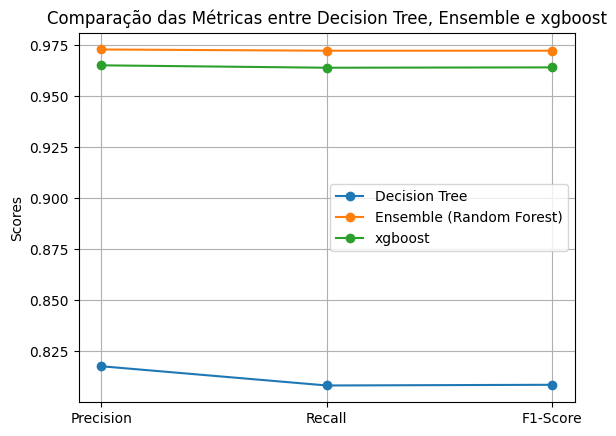

In [25]:
# Preparar os dados para o gráfico
# Preparar os dados para o gráfico
labels = ['Precision', 'Recall', 'F1-Score']
decision_tree_scores = [precision_dt, recall_dt, f1_dt]
ensemble_scores = [precision_rf, recall_rf, f1_rf]
xgboost_scores = [precision_rb, recall_rb, f1_rb]

# Plotar o gráfico
plotar_comparacao_metricas_linhas(labels, decision_tree_scores, ensemble_scores, xgboost_scores)

Exercício 3 - Visualização da árvore de decisão e Medida de Impureza

Neste exercício, você irá explorar a estrutura da árvore de decisão e entender como a medida de impureza é utilizada para avaliar a qualidade das divisões nos nós da árvore. A medida de impureza é um conceito fundamental em árvores de decisão, pois ajuda a determinar a melhor forma de dividir os dados em subconjuntos menores e mais homogêneos.

Você irá:

Visualizar a árvore de decisão treinada no exercício anterior, utilizando ferramentas como o Scikit-learn ou o Graphviz.
Calcular a medida de impureza para diferentes conjuntos de dados e entender como ela impacta o desempenho do modelo.
Analisar como a medida de impureza afeta a escolha dos atributos para dividir os dados em cada nó da árvore.
Entender como a medida de impureza pode ser utilizada para evitar overfitting e melhorar a generalização do modelo.

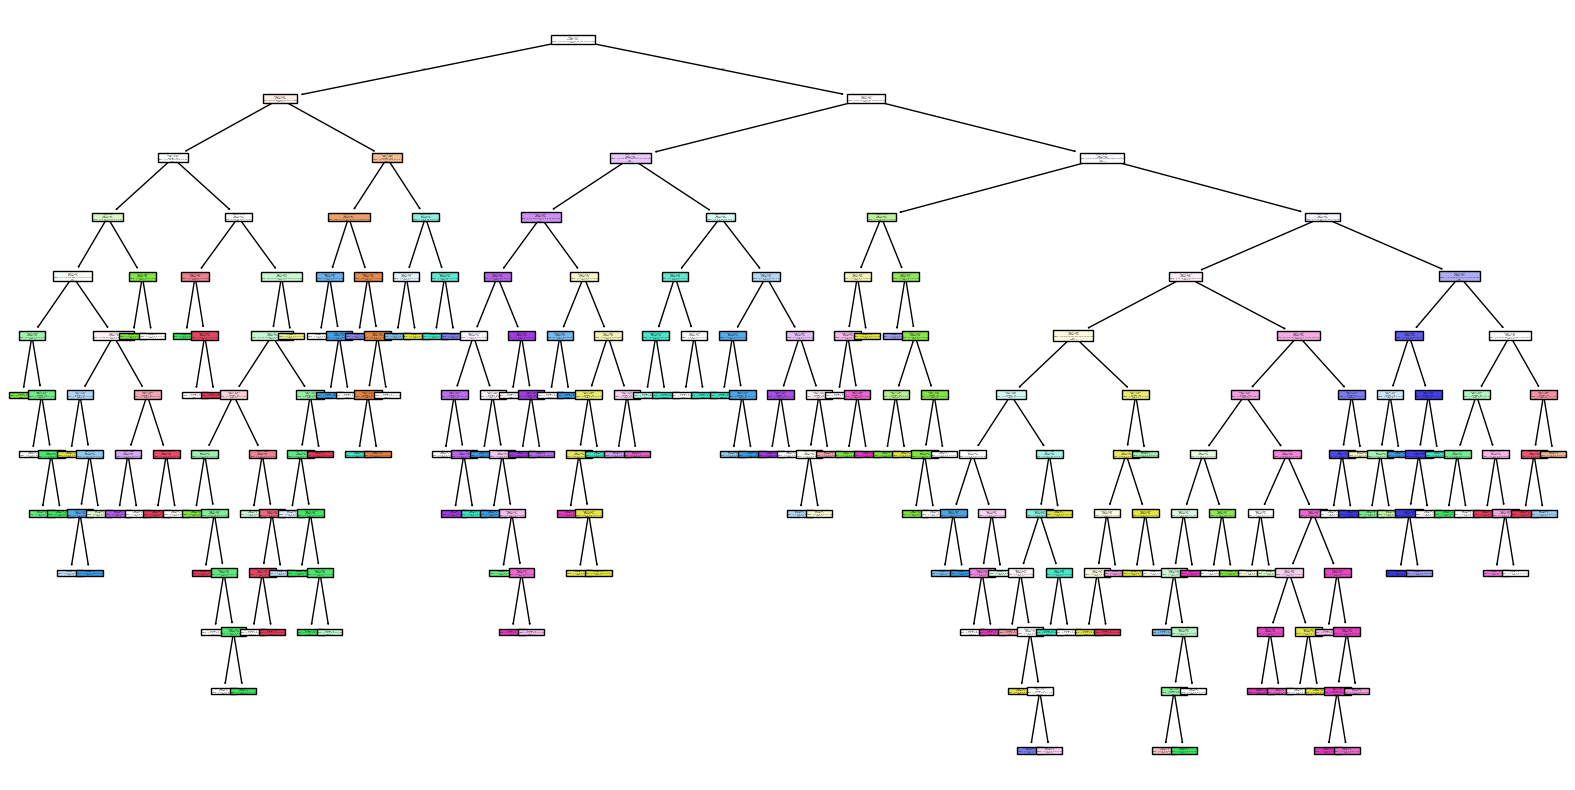

In [26]:
#Exercicio 3
# Nomes das classes para o dataset load_digits
class_names = [str(i) for i in range(10)]

# Exemplo de uso com a árvore de decisão treinada
visualizar_arvore(modelo_DecisionTree, feature_names=None, class_names=class_names)

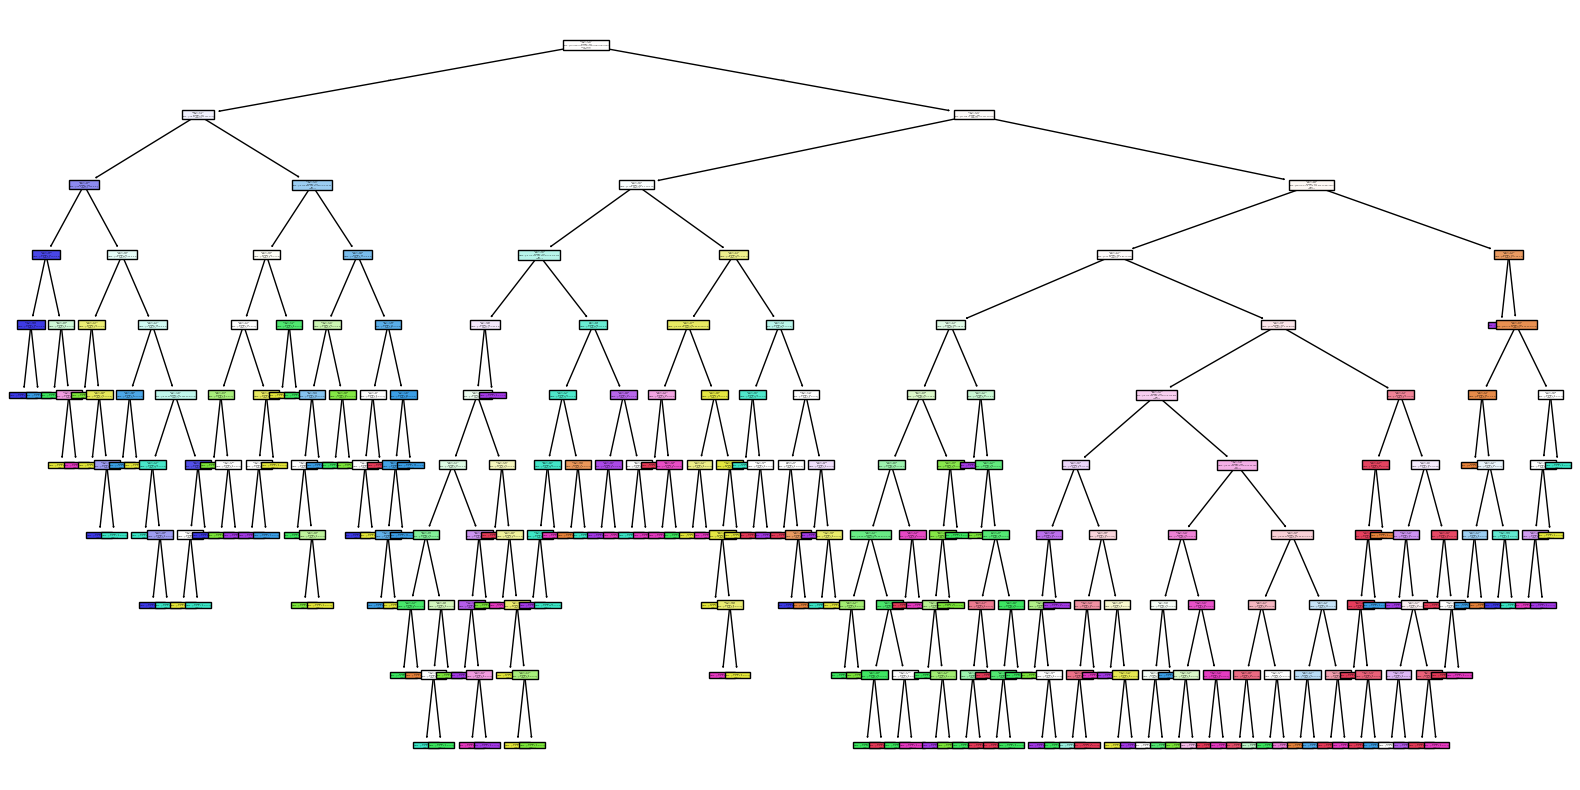

In [27]:
# Visualizar a primeira árvore no Random Forest
arvore = modelo_ensemble.estimators_[0]  # Primeira árvore
# Visualizar a árvore de exemplo do Random Forest
visualizar_arvore(arvore, feature_names=None, class_names=class_names)

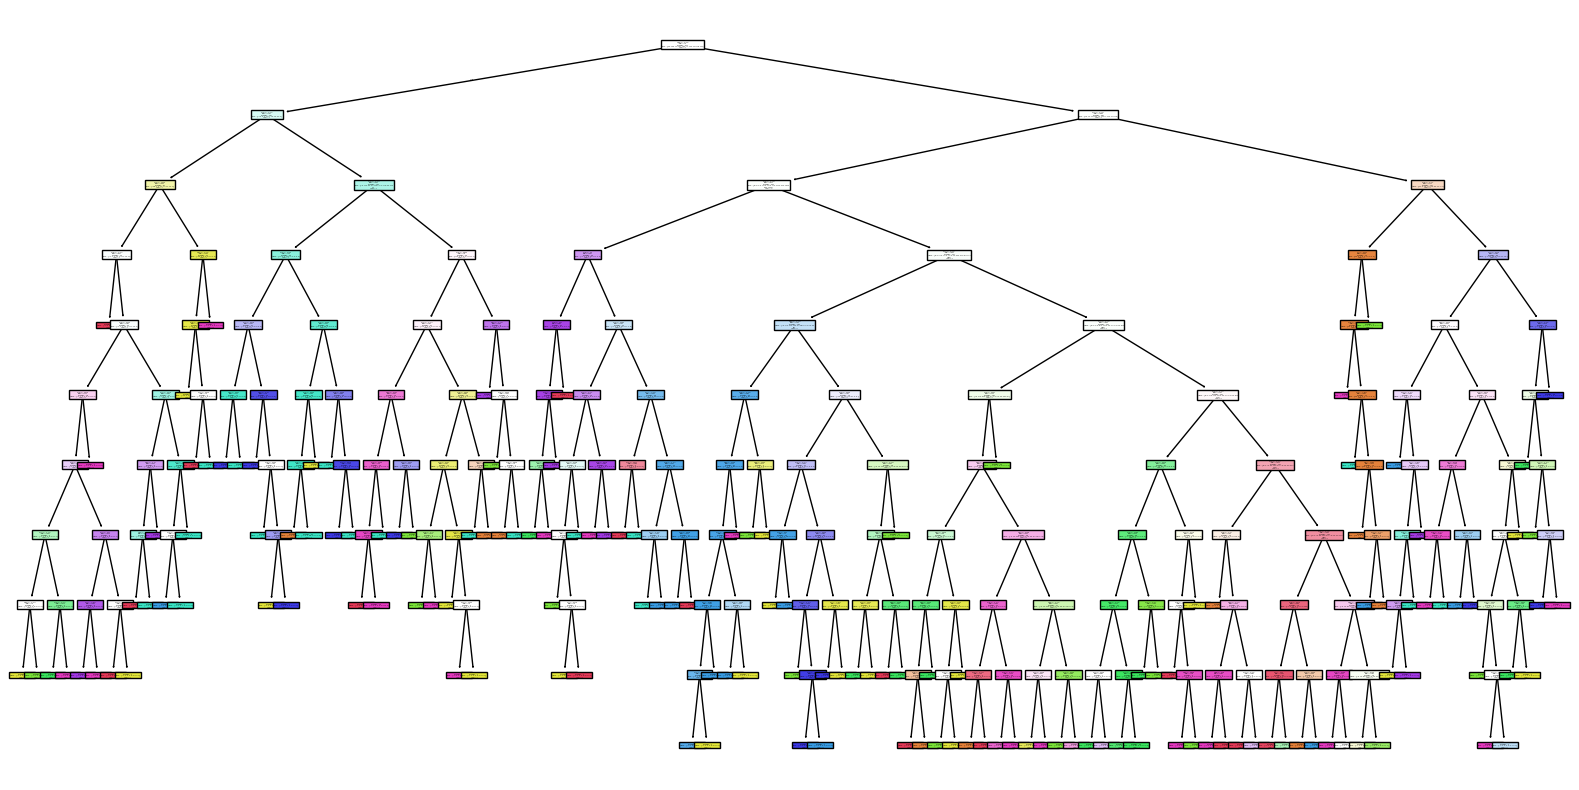

In [28]:
class_names = [str(i) for i in range(10)]
arvore_xgboost = modelo_ensemble.estimators_[1]  # Primeira árvore
# Visualizar a árvore de exemplo do Random Forest

# Exemplo de uso com a árvore de decisão treinada
visualizar_arvore(arvore_xgboost, feature_names=None, class_names=class_names)

In [29]:
# Exemplo de uso com a árvore de decisão
impureza_raiz_dt = impureza_no_raiz(modelo_DecisionTree, X_train_normalizado, y_train)
print(f"Impureza de Gini no nó raiz (Árvore de Decisão): {impureza_raiz_dt:.4f}")

# Exemplo de uso com uma árvore do ensemble
impureza_raiz_rf = impureza_no_raiz(arvore, X_train_normalizado, y_train)
print(f"Impureza de Gini no nó raiz (Random Forest - Uma arvore): {impureza_raiz_rf:.4f}")

# Exemplo de uso com uma árvore do ensemble
impureza_raiz_rf = impureza_no_raiz(arvore_xgboost, X_train_normalizado, y_train)
print(f"Impureza de Gini no nó raiz (Random Forest - Uma arvore): {impureza_raiz_rf:.4f}")

Impureza de Gini no nó raiz (Árvore de Decisão): -112.0000
Impureza de Gini no nó raiz (Random Forest - Uma arvore): -69.0000
Impureza de Gini no nó raiz (Random Forest - Uma arvore): -280.0000


Exercício 4 - Preparação do container para deploy do modelo

Neste exercício, você irá aprender a preparar um container Docker para deploy do modelo de árvore de decisão treinado. Isso envolve criar um ambiente isolado e portável que possa ser facilmente implantado em diferentes contextos.

Você irá:

Criar um arquivo Dockerfile que define as instruções para construir a imagem do container.
Especificar as dependências necessárias para o modelo, incluindo bibliotecas e frameworks.
Configurar o ambiente de execução do modelo, incluindo a definição de variáveis de ambiente e a configuração de portas.
Construir a imagem do container utilizando o comando docker build.
Executar o container utilizando o comando docker run e testar a imagem.
Dicas:

Certifique-se de que o arquivo Dockerfile esteja configurado corretamente para construir a imagem do container.

In [30]:
#exercicio 4
#dockerfile já está criado
#em Requirements já tem todas as dependencias do python e o docker chama o requirements

Exercício 5 - Deploy do modelo usando Flask utilizando uma imagem docker

Neste exercício, você irá aprender a deployar o modelo de árvore de decisão treinado utilizando o framework Flask e uma imagem Docker. Isso envolve criar uma API REST que permita realizar inferências com o modelo e entender como funciona o processo de deploy de um modelo em um ambiente de produção.

Você irá:

Criar uma aplicação Flask que carregue o modelo treinado e o utilize para realizar inferências.
Definir uma API REST que permita enviar solicitações de inferência ao modelo e receber respostas.
Configurar a aplicação Flask dentro da imagem Docker do exercício anterior.
Deployar a aplicação Flask no container Docker e testar a API REST.
Entender como funciona o processo de deploy de um modelo em um ambiente de produção, incluindo a configuração de variáveis de ambiente e a gestão de dependências.

Exercício 6 - Notebook cliente com inferência direto do servidor

Neste exercício, você irá aprender a criar um notebook cliente que realize inferências direto do servidor onde o modelo de árvore de decisão foi deployado. Isso envolve entender como funciona o processo de comunicação entre o cliente e o servidor e como realizar inferências com o modelo deployado.

Você irá:

Criar um notebook cliente.
Importar as bibliotecas necessárias para realizar inferências com o modelo, incluindo a biblioteca requests para enviar solicitações HTTP ao servidor criado no exercício anterior.
Configurar o notebook cliente para se conectar ao servidor onde o modelo foi deployado.
Enviar solicitações de inferência ao servidor utilizando a API REST criada no exercício anterior.
Receber as respostas do servidor e visualizar os resultados das inferências.

In [33]:
import requests
import json
from PIL import Image
import numpy as np

# Abra a imagem usando Pillow
image = Image.open('/workspaces/mba-deeplearning-iad-006-2024-public/imagens/imagem_positiva.png').convert("L")

# Converta a imagem para um array numpy
image_array = np.array(image)

# URL do servidor onde a API REST está rodando
url = 'http://localhost:8000/main'

# Gerar uma lista de 64 valores para inferência
data = {
    "features": image_array.flatten().tolist()
    }

# Converter os dados para o formato JSON
data_json = json.dumps(data)

# Enviar a solicitação POST ao servidor
response = requests.post(url, data=data_json, headers={'Content-Type': 'application/json'})

# Verificar a resposta do servidor
if response.status_code == 200:
    prediction = response.json()
    print(f"Previsão: {prediction['prediction']}")
else:
    print(f"Erro: {response.status_code}, {response.text}")

Previsão: [0]


In [34]:
#teste
from PIL import Image
import numpy as np

# Abra a imagem usando Pillow
image = Image.open('/workspaces/mba-deeplearning-iad-006-2024-public/imagens/imagem_positiva.png').convert("L")

# Converta a imagem para um array numpy
image_array = np.array(image).flatten()

# Exibe as dimensões do array e o array em si
print(image_array.shape)
print(image_array)


(64,)
[  0   0  85 221 153  17   0   0   0   0 221 255 170 255  85   0   0  51
 255  34   0 187 136   0   0  68 204   0   0 136 136   0   0  85 136   0
   0 153 136   0   0  68 187   0  17 204 119   0   0  34 238  85 170 204
   0   0   0   0 102 221 170   0   0   0]
